In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")

In [26]:
os.makedirs("plots", exist_ok=True)
df = pd.read_csv(r"Enhanced_Synthetic_Cyber_Attack_Dataset.csv")
df

,Timestamp,Source_IP,Destination_IP,Port,Protocol,Packet_Size,Duration,Attack_Type,Is_Attack,Packet_Loss,Latency,Throughput,Jitter,Authentication_Failure
0,2023-01-01 00:00:00,172.16.0.3,10.0.0.101,8002,UDP,783,69.673338,DoS,0,4.073125,103.388384,87.032649,47.660918,0
1,2023-01-01 01:00:00,192.168.1.4,172.16.0.102,4127,TCP,1201,70.244395,Data Injection,0,4.680815,244.054190,13.951388,25.885129,1
2,2023-01-01 02:00:00,192.168.1.1,192.168.1.100,1361,UDP,543,17.252221,APT,0,2.567589,439.247981,12.818457,40.973456,0
3,2023-01-01 03:00:00,172.16.0.3,192.168.1.100,8427,UDP,85,50.061264,Normal,1,4.751396,264.100320,17.649663,27.401669,0
4,2023-01-01 04:00:00,172.16.0.3,192.168.1.100,358,UDP,1436,41.254614,Malware,0,2.678445,465.005371,96.030609,2.135172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-02-11 11:00:00,192.168.1.1,192.168.1.100,5804,TCP,1262,70.240535,Normal,0,0.753055,352.826579,25.757474,27.950894,0
996,2023-02-11 12:00:00,192.168.1.1,10.0.0.101,4603,ICMP,1376,33.202087,APT,0,4.663241,226.042265,45.667108,38.228241,0
997,2023-02-11 13:00:00,192.168.1.4,192.168.1.100,5966,UDP,1021,67.598724,Normal,0,1.915294,51.275669,3.099021,31.005630,0
998,2023-02-11 14:00:00,192.168.1.4,172.16.0.102,4961,TCP,82,39.654129,DoS,0,3.647607,354.053887,39.783030,11.683482,0


In [27]:
df.columns

Index(['Timestamp', 'Source_IP', 'Destination_IP', 'Port', 'Protocol',
       'Packet_Size', 'Duration', 'Attack_Type', 'Is_Attack', 'Packet_Loss',
       'Latency', 'Throughput', 'Jitter', 'Authentication_Failure'],
      dtype='object')

In [28]:
df.isnull().sum()

Timestamp                 0
Source_IP                 0
Destination_IP            0
Port                      0
Protocol                  0
Packet_Size               0
Duration                  0
Attack_Type               0
Is_Attack                 0
Packet_Loss               0
Latency                   0
Throughput                0
Jitter                    0
Authentication_Failure    0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1000 non-null   object 
 1   Source_IP               1000 non-null   object 
 2   Destination_IP          1000 non-null   object 
 3   Port                    1000 non-null   int64  
 4   Protocol                1000 non-null   object 
 5   Packet_Size             1000 non-null   int64  
 6   Duration                1000 non-null   float64
 7   Attack_Type             1000 non-null   object 
 8   Is_Attack               1000 non-null   int64  
 9   Packet_Loss             1000 non-null   float64
 10  Latency                 1000 non-null   float64
 11  Throughput              1000 non-null   float64
 12  Jitter                  1000 non-null   float64
 13  Authentication_Failure  1000 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory

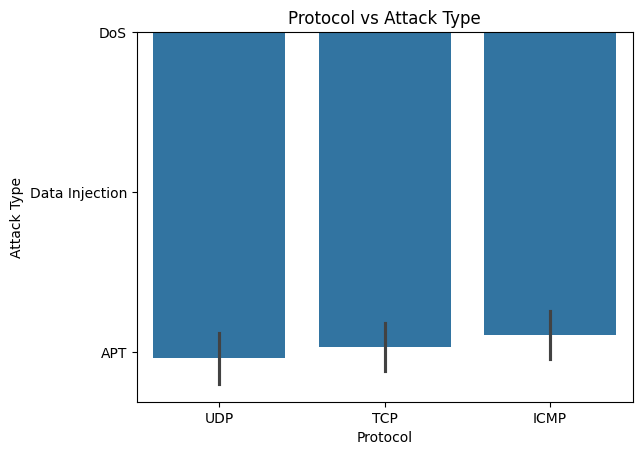

In [30]:
# sns.lineplot(x=df['Packet_Size'], y=df['Duration'])
sns.barplot(x='Protocol', y='Attack_Type', data=df)
plt.xlabel('Protocol')
plt.ylabel('Attack Type')
plt.title('Protocol vs Attack Type')
plt.savefig("plots/Protocol vs Attack Type.svg") 
plt.show()

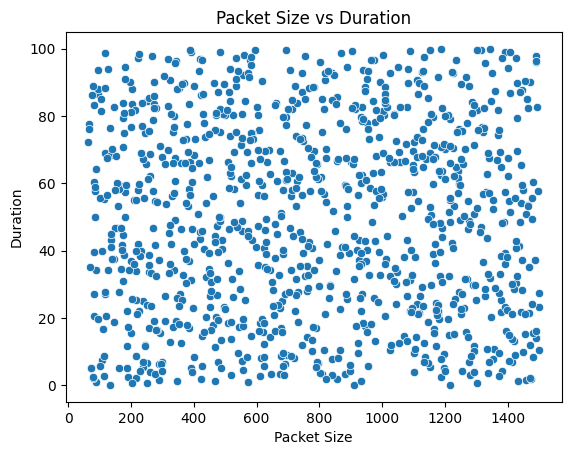

In [31]:
sns.scatterplot(x=df['Packet_Size'],y=df['Duration'])
plt.xlabel('Packet Size')
plt.ylabel('Duration')
plt.title('Packet Size vs Duration')
plt.savefig("plots/Packet Size vs Duration.svg")
plt.show()

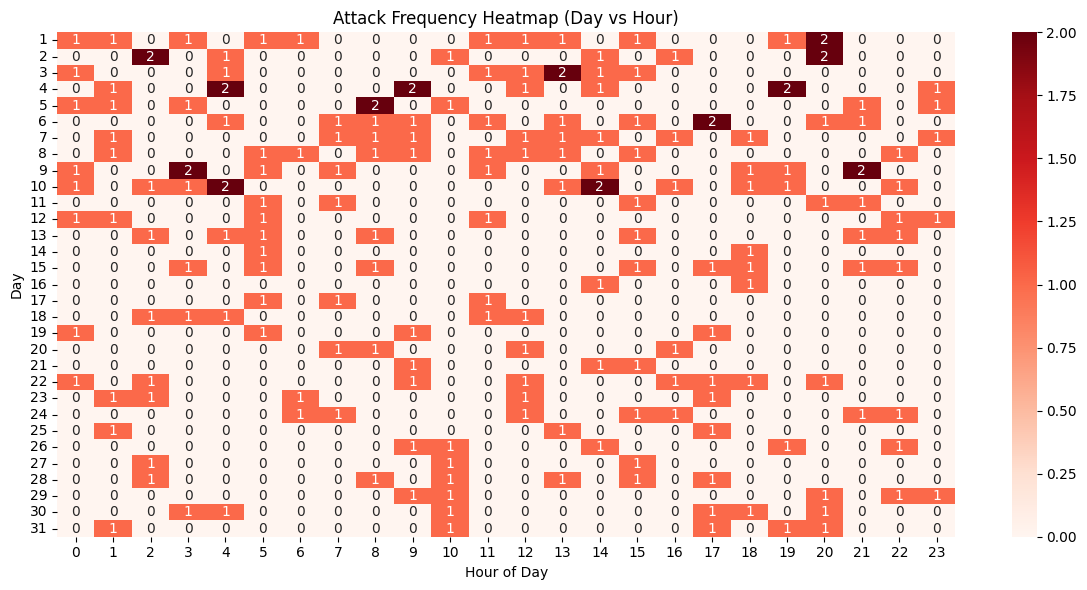

In [32]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day

pivot = df[df['Is_Attack'] == 1].pivot_table(index='Day', columns='Hour', values='Is_Attack', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='Reds', annot=True, fmt='d')
plt.title('Attack Frequency Heatmap (Day vs Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Day')
plt.tight_layout()
plt.show()

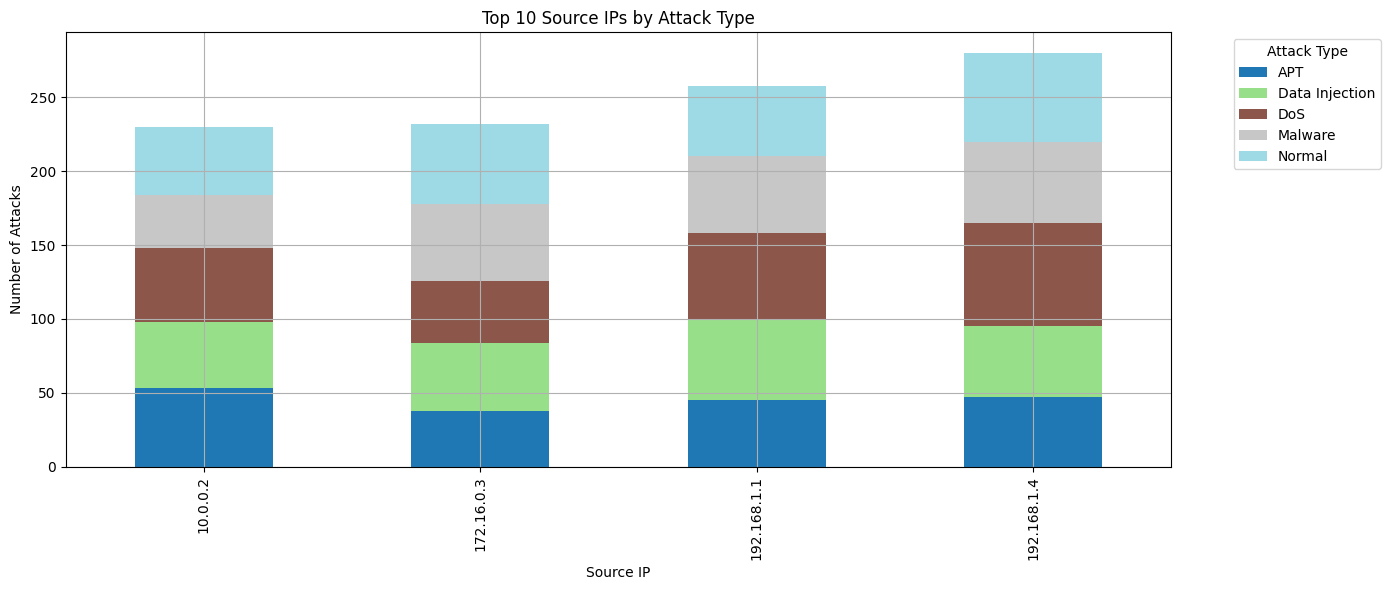

In [33]:
top_ips = df['Source_IP'].value_counts().head(10).index
df_top = df[df['Source_IP'].isin(top_ips)]
pivot = df_top.pivot_table(index='Source_IP', columns='Attack_Type', aggfunc='size', fill_value=0)

pivot.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Top 10 Source IPs by Attack Type')
plt.xlabel('Source IP')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.savefig("plots/Top 10 Source IPs by Attack Type.svg")
plt.show()

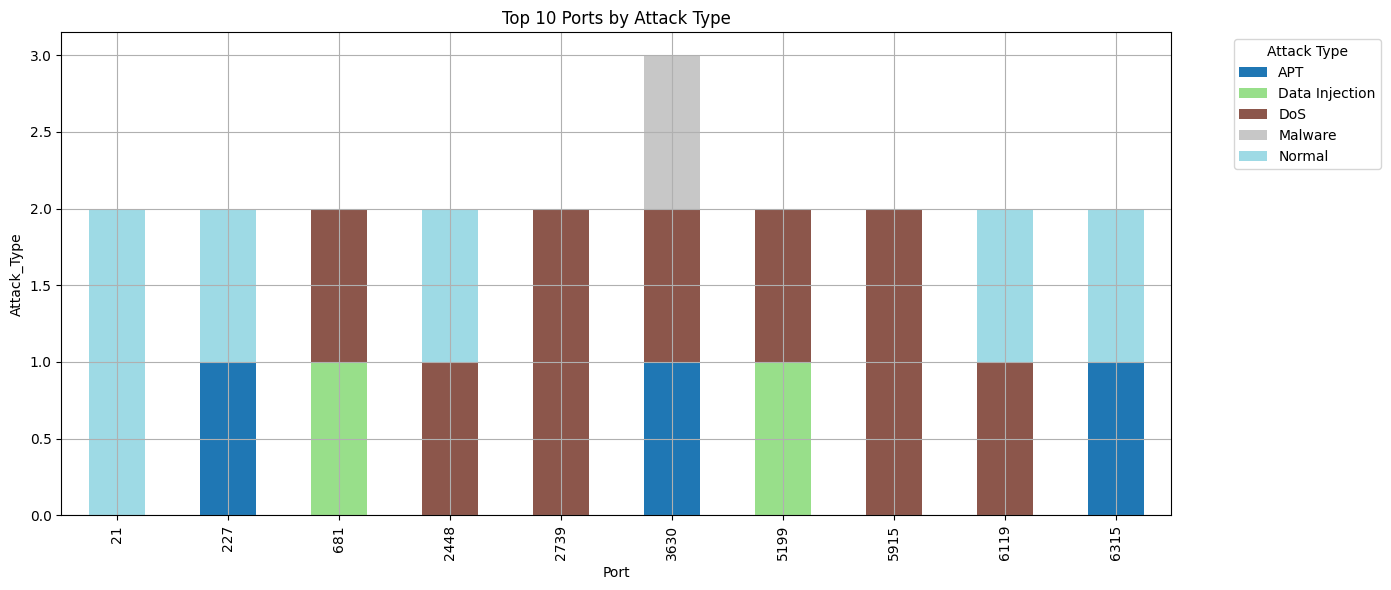

In [34]:
top_ips = df['Port'].value_counts().head(10).index
df_top = df[df['Port'].isin(top_ips)]
pivot = df_top.pivot_table(index='Port', columns='Attack_Type', aggfunc='size', fill_value=0)

pivot.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Top 10 Ports by Attack Type')
plt.xlabel('Port')
plt.ylabel('Attack_Type')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

### Correlation of Numeric Dataset

Numeric columns: ['Port', 'Packet_Size', 'Duration', 'Is_Attack', 'Packet_Loss', 'Latency', 'Throughput', 'Jitter', 'Authentication_Failure']


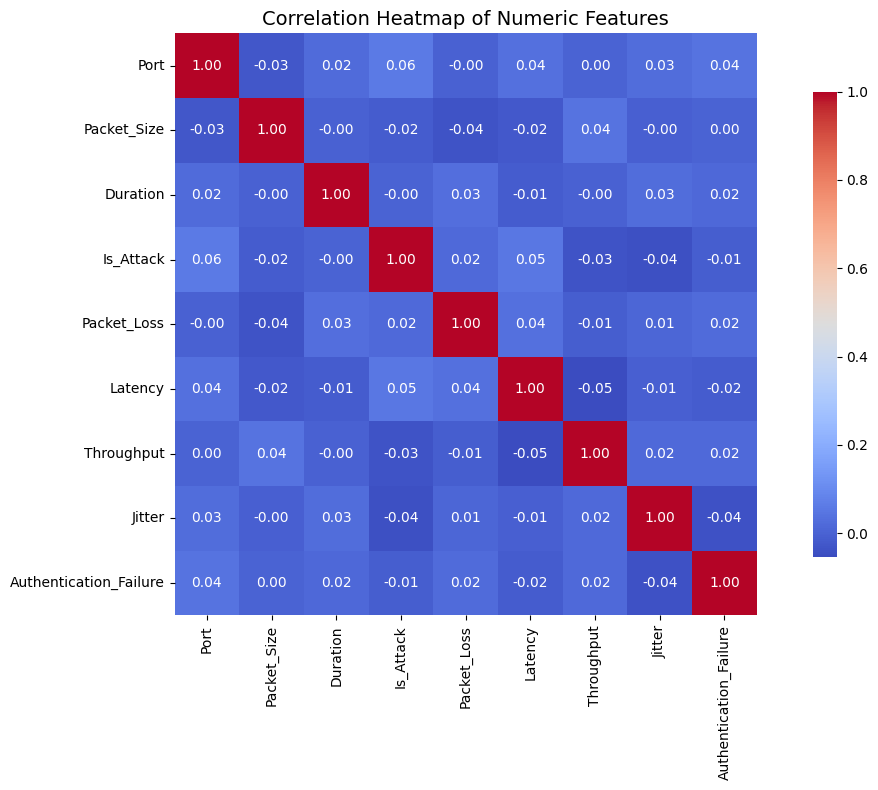

In [35]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print("Numeric columns:", numeric_df.columns.tolist())

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.tight_layout()
plt.savefig("plots/Correlation Heatmap of Numeric Features.svg")
plt.show()

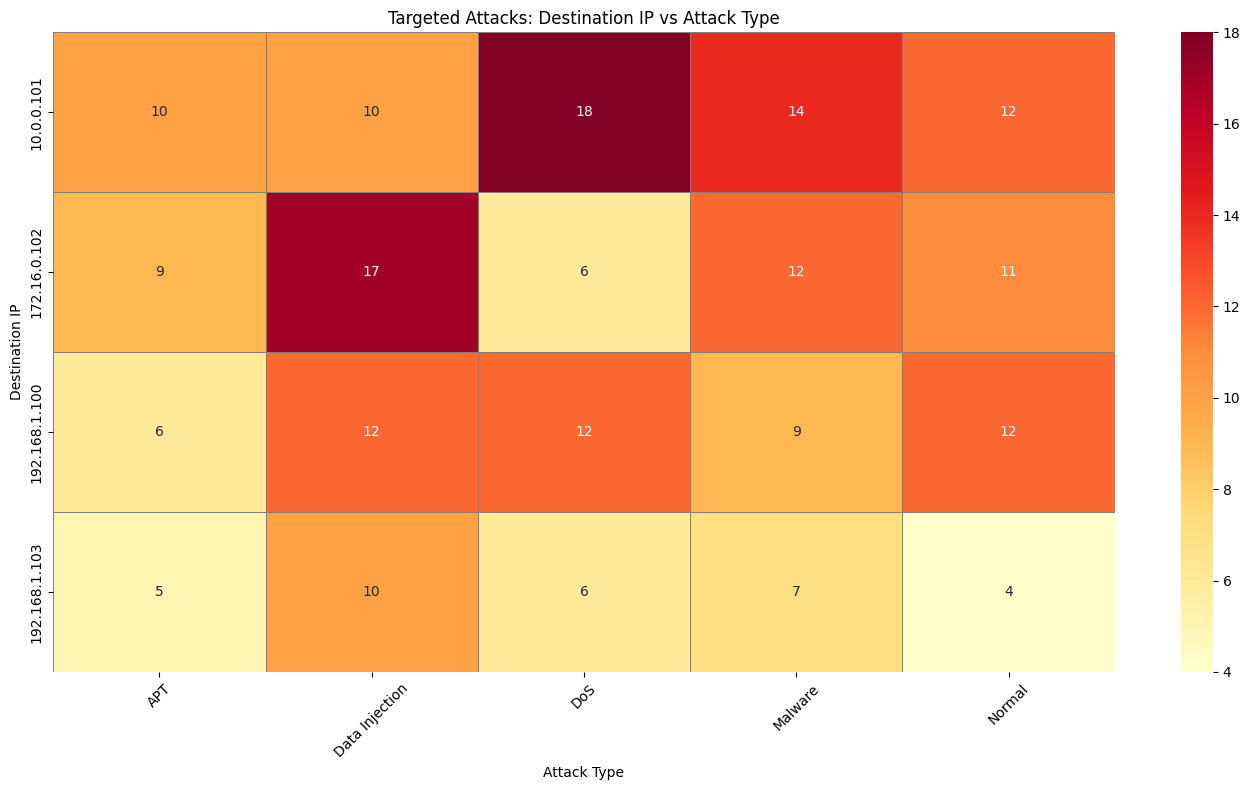

In [36]:
df_attacks = df[df['Is_Attack']==1]
pivot_table = df_attacks.pivot_table(index='Destination_IP',columns='Attack_Type',aggfunc='size',fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', linewidths=0.5, linecolor='gray', annot=True, fmt='d')
plt.title('Targeted Attacks: Destination IP vs Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Destination IP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/Targeted Attacks Destination IP vs Attack Type.svg")
plt.show()

In [37]:
df

,Timestamp,Source_IP,Destination_IP,Port,Protocol,Packet_Size,Duration,Attack_Type,Is_Attack,Packet_Loss,Latency,Throughput,Jitter,Authentication_Failure,Hour,Day
0,2023-01-01 00:00:00,172.16.0.3,10.0.0.101,8002,UDP,783,69.673338,DoS,0,4.073125,103.388384,87.032649,47.660918,0,0,1
1,2023-01-01 01:00:00,192.168.1.4,172.16.0.102,4127,TCP,1201,70.244395,Data Injection,0,4.680815,244.054190,13.951388,25.885129,1,1,1
2,2023-01-01 02:00:00,192.168.1.1,192.168.1.100,1361,UDP,543,17.252221,APT,0,2.567589,439.247981,12.818457,40.973456,0,2,1
3,2023-01-01 03:00:00,172.16.0.3,192.168.1.100,8427,UDP,85,50.061264,Normal,1,4.751396,264.100320,17.649663,27.401669,0,3,1
4,2023-01-01 04:00:00,172.16.0.3,192.168.1.100,358,UDP,1436,41.254614,Malware,0,2.678445,465.005371,96.030609,2.135172,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-02-11 11:00:00,192.168.1.1,192.168.1.100,5804,TCP,1262,70.240535,Normal,0,0.753055,352.826579,25.757474,27.950894,0,11,11
996,2023-02-11 12:00:00,192.168.1.1,10.0.0.101,4603,ICMP,1376,33.202087,APT,0,4.663241,226.042265,45.667108,38.228241,0,12,11
997,2023-02-11 13:00:00,192.168.1.4,192.168.1.100,5966,UDP,1021,67.598724,Normal,0,1.915294,51.275669,3.099021,31.005630,0,13,11
998,2023-02-11 14:00:00,192.168.1.4,172.16.0.102,4961,TCP,82,39.654129,DoS,0,3.647607,354.053887,39.783030,11.683482,0,14,11


In [38]:
df = df.drop(columns=["Timestamp", "Source_IP", "Destination_IP", "Attack_Type","Hour","Day"])

In [39]:
df["Protocol"] = LabelEncoder().fit_transform(df["Protocol"])

X = df.drop("Is_Attack", axis=1)
y = df["Is_Attack"]

In [40]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_data = imputer.fit_transform(df)
print(imputed_data)

[[8.00200000e+03 2.00000000e+00 7.83000000e+02 ... 8.70326494e+01
  4.76609182e+01 0.00000000e+00]
 [4.12700000e+03 1.00000000e+00 1.20100000e+03 ... 1.39513877e+01
  2.58851286e+01 1.00000000e+00]
 [1.36100000e+03 2.00000000e+00 5.43000000e+02 ... 1.28184567e+01
  4.09734556e+01 0.00000000e+00]
 ...
 [5.96600000e+03 2.00000000e+00 1.02100000e+03 ... 3.09902055e+00
  3.10056302e+01 0.00000000e+00]
 [4.96100000e+03 1.00000000e+00 8.20000000e+01 ... 3.97830302e+01
  1.16834822e+01 0.00000000e+00]
 [6.28700000e+03 0.00000000e+00 2.58000000e+02 ... 5.71748695e+01
  1.47057822e-01 0.00000000e+00]]


In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
smote = SMOTE(random_state=42)
X_balanced_full, y_balanced_full = smote.fit_resample(X_scaled, y)

In [43]:
indices = np.random.choice(len(X_balanced_full), size=4000, replace=True)
X_balanced = X_balanced_full[indices]
y_balanced = y_balanced_full[indices]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [45]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

In [46]:
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    if name == "Random Forest":

        print(f"\n----- {name} -----")
        print("Accuracy:", acc*100, "%")
        print("Precision:", prec)
        print("Recall:", rec)
        print("F1-Score:", f1)
        print("Classification Report:\n", classification_report(y_test, y_pred))

        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        print(f"ROC AUC for {name}: {roc_auc:.2f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC - Random Forest')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.savefig("plots/ROC - Random Forest.svg")
        plt.show()
        
    else:
        print(f"\n----- {name} -----")
        print("Accuracy:", acc*100, "%")
        print("Precision:", prec)
        print("Recall:", rec)
        print("F1-Score:", f1)
        print("Classification Report:\n", classification_report(y_test, y_pred))
    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    }


----- Random Forest -----
Accuracy: 98.625 %
Precision: 0.9829268292682927
Recall: 0.9901719901719902
F1-Score: 0.9865361077111383
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       393
           1       0.98      0.99      0.99       407

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

ROC AUC for Random Forest: 1.00


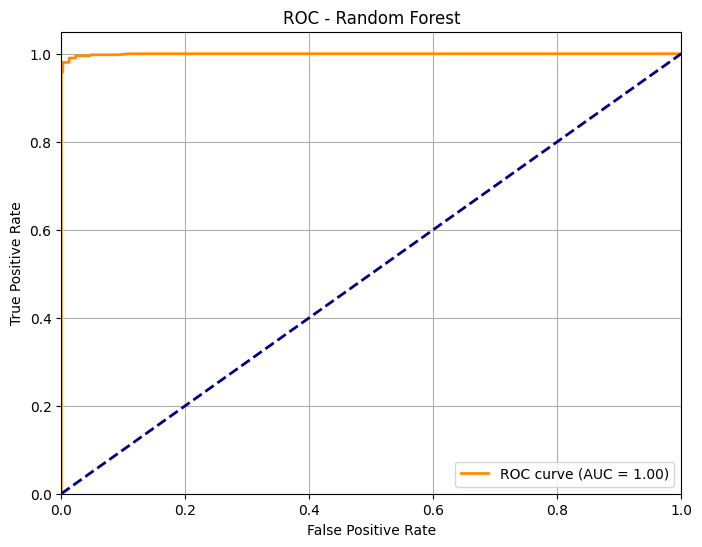


----- Decision Tree -----
Accuracy: 97.625 %
Precision: 0.9754901960784313
Recall: 0.9778869778869779
F1-Score: 0.9766871165644172
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       393
           1       0.98      0.98      0.98       407

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800


----- KNN -----
Accuracy: 89.25 %
Precision: 0.8268839103869654
Recall: 0.9975429975429976
F1-Score: 0.9042316258351893
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88       393
           1       0.83      1.00      0.90       407

    accuracy                           0.89       800
   macro avg       0.91      0.89      0.89       800
weighted avg       0.91      0.89      0.89       800


----- Logistic Regression -----
Accuracy: 59

In [47]:
results = []
for name, model in models.items():
    result = evaluate_model(name, model)
    results.append(result)

results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
print("\n\n Summary of all the models")
print(results_df)
